In [ ]:
import os
import pandas as pd
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

def read_celeba_txt(path):
    return pd.read_csv(path, sep='\s+', skiprows=1)

attr_df = read_celeba_txt('list_attr_celeba.txt')
bbox_df = read_celeba_txt('list_bbox_celeba.txt').set_index('image_id')
land_df = read_celeba_txt('list_landmarks_celeba.txt').set_index('image_id')

IMG_DIR = 'img_celeba' # путь к вашим 20 Гб фото
SAVE_DIR = 'celeba_cropped_10k'
os.makedirs(SAVE_DIR, exist_ok=True)

# Фильтрация 10,000+ качественных имен
mask = (attr_df['Blurry'] == -1) & (attr_df['Eyeglasses'] == -1)
filtered_names = attr_df[mask]['image_id'].values[:10500]

selected_list = []
for img_id in tqdm(filtered_names, desc="Cropping images"):
    img_path = os.path.join(IMG_DIR, img_id)
    if not os.path.exists(img_path): continue
    
    img = cv2.imread(img_path)
    b = bbox_df.loc[img_id]
    x, y, w, h = int(b['x_1']), int(b['y_1']), int(b['width']), int(b['height'])
    
    # Кроп с небольшим запасом
    m_w, m_h = int(w * 0.1), int(h * 0.1)
    y1, y2 = max(0, y-m_h), min(img.shape[0], y+h+m_h)
    x1, x2 = max(0, x-m_w), min(img.shape[1], x+w+m_w)
    
    face = img[y1:y2, x1:x2]
    if face.size == 0: continue
    
    face = cv2.resize(face, (128, 128))
    cv2.imwrite(os.path.join(SAVE_DIR, img_id), face)
    selected_list.append(img_id)

pd.DataFrame({'image_id': selected_list}).to_csv('selected_names.csv', index=False)

<>:15: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:15: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
C:\Users\mvkiselev\AppData\Local\Temp\ipykernel_47560\3008757808.py:15: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
  return pd.read_csv(path, sep='\s+', skiprows=1)
Cropping images: 100%|██████████| 10500/10500 [01:57<00:00, 89.39it/s] 


## Проверка файла list_landmarks_align_celeba.csv

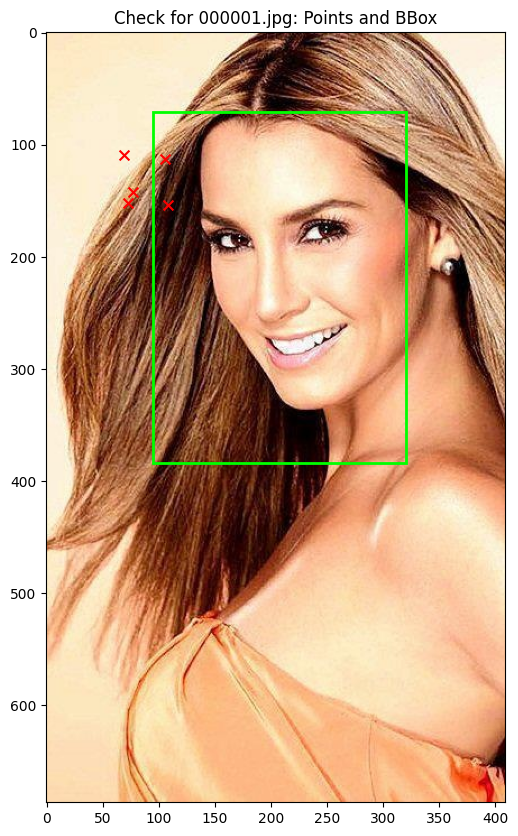

In [5]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

# 1. Загружаем ваши CSV
bbox_df = pd.read_csv('list_bbox_celeba.csv').set_index('image_id')
land_df = pd.read_csv('list_landmarks_align_celeba.csv').set_index('image_id')

# 2. Выбираем любую картинку из вашей папки Original Wild Images
# Замените '000001.jpg' на имя файла, который точно у вас есть
img_name = '000001.jpg' 
img_path = os.path.join('img_celeba', img_name) # ваш путь к Wild картинкам

if os.path.exists(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Получаем координаты точек (предполагаем стандартные названия колонок в CSV)
    # В CelebA порядок обычно: LE, RE, Nose, LM, RM
    l = land_df.loc[img_name]
    pts = [
        (l['lefteye_x'], l['lefteye_y']),
        (l['righteye_x'], l['righteye_y']),
        (l['nose_x'], l['nose_y']),
        (l['leftmouth_x'], l['leftmouth_y']),
        (l['rightmouth_x'], l['rightmouth_y'])
    ]
    
    # Рисуем точки на оригинальном фото
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    for p in pts:
        plt.scatter(p[0], p[1], s=50, c='red', marker='x')
        
    # Рисуем BBox для проверки
    b = bbox_df.loc[img_name]
    rect = plt.Rectangle((b['x_1'], b['y_1']), b['width'], b['height'], 
                         fill=False, color='lime', linewidth=2)
    plt.gca().add_patch(rect)
    
    plt.title(f"Check for {img_name}: Points and BBox")
    plt.show()
else:
    print(f"Файл {img_name} не найден по пути {img_path}")

#### Надо использовать list_landmarks_celeba.txt - на Kaggle нет

#### Здесь: https://drive.google.com/drive/folders/0B7EVK8r0v71pOC0wOVZlQnFfaGs?resourcekey=0-pEjrQoTrlbjZJO2UL8K_WQ

## Проверка файла list_landmarks_celeba.csv

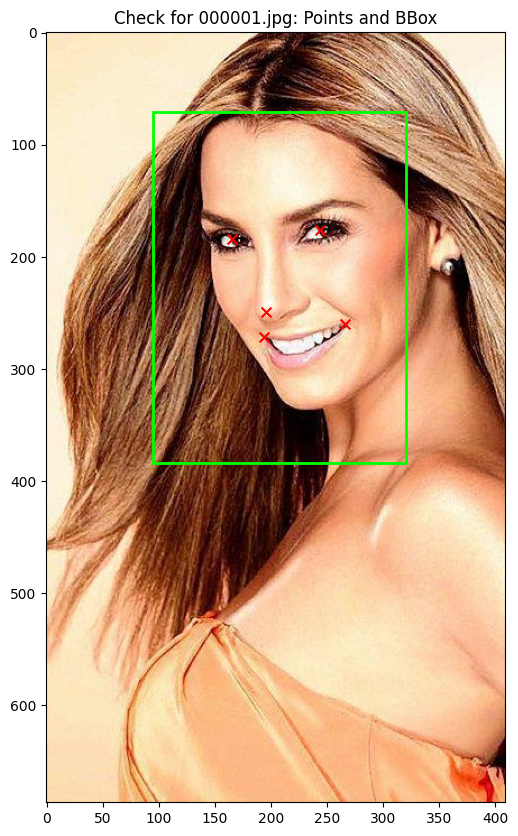

In [9]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

# 1. Загружаем ваши CSV
bbox_df = read_celeba_txt('list_bbox_celeba.txt').set_index('image_id')
land_df = read_celeba_txt('list_landmarks_celeba.txt').set_index('image_id')

# 2. Выбираем любую картинку из вашей папки Original Wild Images
# Замените '000001.jpg' на имя файла, который точно у вас есть
img_name = '000001.jpg' 
img_path = os.path.join('img_celeba', img_name) # ваш путь к Wild картинкам

if os.path.exists(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Получаем координаты точек (предполагаем стандартные названия колонок в CSV)
    # В CelebA порядок обычно: LE, RE, Nose, LM, RM
    l = land_df.loc[img_name]
    pts = [
        (l['lefteye_x'], l['lefteye_y']),
        (l['righteye_x'], l['righteye_y']),
        (l['nose_x'], l['nose_y']),
        (l['leftmouth_x'], l['leftmouth_y']),
        (l['rightmouth_x'], l['rightmouth_y'])
    ]
    
    # Рисуем точки на оригинальном фото
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    for p in pts:
        plt.scatter(p[0], p[1], s=50, c='red', marker='x')
        
    # Рисуем BBox для проверки
    b = bbox_df.loc[img_name]
    rect = plt.Rectangle((b['x_1'], b['y_1']), b['width'], b['height'], 
                         fill=False, color='lime', linewidth=2)
    plt.gca().add_patch(rect)
    
    plt.title(f"Check for {img_name}: Points and BBox")
    plt.show()
else:
    print(f"Файл {img_name} не найден по пути {img_path}")